# Reading TREx Blueline raw image data

Below we'll retrieve TREx Blueline data, read it, and do a bit of processing. An internet connection is required since we'll need to download data.

## Retrieve a minute of data

In [1]:
import requests

In [2]:
# 2020-03-21 06:30 UTC in Gillam, Manitoba, was a particularly good night
url = "https://data.phys.ucalgary.ca/sort_by_project/TREx/blueline/stream0/2020/03/21/gill_blue-814/ut06/20200321_0630_gill_blue-814_full.pgm.gz"
r = requests.get(url)

In [3]:
# save data to a local file
filename = "20200321_0630_gill_blue-814_full.pgm.gz"
with open(filename, 'wb') as f:
    f.write(r.content)

## Read the data file

In [4]:
import trex_imager_readfile

In [5]:
img, meta, problematic_files = trex_imager_readfile.read_blueline(filename)

In [6]:
# the imager takes a picture every 3 seconds, so a 1-minute file usually contains 20 images
print("Image dimensions: %d x %d" % (img.shape[0], img.shape[1]))
print("Number of images: %d" % (img.shape[2]))

Image dimensions: 270 x 320
Number of images: 20


In [7]:
# data for the first image
img[:,:,0]

array([[709, 376, 540, ..., 451, 618, 636],
       [452, 375, 460, ..., 561, 450, 513],
       [384, 464, 375, ..., 341, 576, 510],
       ...,
       [743, 441, 575, ..., 670, 677, 507],
       [584, 567, 606, ..., 750, 636, 661],
       [651, 408, 747, ..., 691, 686, 558]], dtype=uint16)

In [8]:
# metadata for first image
meta[0]

{'Project unique ID': 'trex',
 'Site unique ID': 'gill',
 'Imager unique ID': 'blue-814',
 'Mode unique ID': 'full',
 'Geographic latitude': '56.376723',
 'Geographic longitude': '-94.643664',
 'Camera model': 'Andor Zyla 5.5',
 'Camera serial sumber': 'VSC-09814',
 'CCD type': 'CMOS',
 'CCD xsize': '2560 pixels',
 'CCD ysize': '2160 pixels',
 'Pixel depth': '16 bits',
 'CCD xbinned': '8',
 'CCD ybinned': '8',
 'Readout rate': '280 MHz',
 'Pre-amp gain': '16-bit (low noise & high well capacity)',
 'Spurious noise filter': 'True',
 'Static blemish correction': 'True',
 'Computer name': 'gill-blue',
 'Operating System': 'Linux 3.10.0-1062.12.1.el7.x86_64 #1 SMP Tue Feb 4 23:02:59 UTC 2020',
 'NTP target': '127.127.20.0',
 'NTP delay': '0.000',
 'NTP offset': '13.616',
 'NTP jitter': '23.250',
 'Mode sequence number': '5481',
 'Current CCD temperature': '-0.4400 C',
 'Digitemp camera': '19.88 C',
 'Bright light status': 'DARK (550)',
 'Mode UID': 'full',
 'Exposure options': 'WIDTH=2560 H

## Visualize the image

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

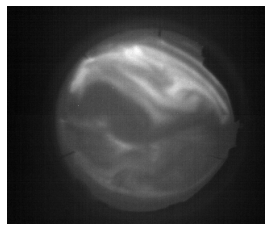

In [11]:
plt.imshow(img[:,:,0], cmap="gray")
plt.axis("off")
plt.show() 

## Subtract the background image

Because the TREx Blueline imager uses a CMOS detector, we have some noise that can get removed using a background frame. Currently, this isn't the best way to do this since the dark frame changes every time the camera turns on. However, it's the best we have right now and hope to improve it as the rest of the TREx Blueline cameras get deployed (summer 2021). 

In [12]:
# retrieve the background image
url = "https://data.phys.ucalgary.ca/sort_by_project/TREx/blueline/calibration/dark_frames/blue-814_20200203/dark_frame_3s.pgm"
r = requests.get(url)
dark_frame_filename = "dark_frame_3s.pgm"
with open(dark_frame_filename, 'wb') as f:
    f.write(r.content)

In [13]:
# read the dark frame
dark_img, dark_meta, problematic_files = trex_imager_readfile.read_blueline(dark_frame_filename)

In [14]:
# subtract the dark frame (background subtraction function from OpenCV)
import cv2
img_subtracted = cv2.subtract(img[:,:,0], dark_img[:,:,0])

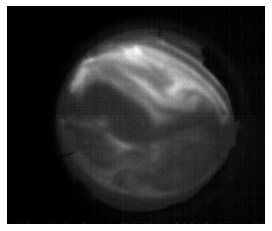

In [15]:
# show the image
plt.imshow(img_subtracted, cmap="gray")
plt.axis("off")
plt.show() 

## Cleanup downloaded files

In [16]:
# remove the downloaded files
import os
os.remove(filename)
os.remove(dark_frame_filename)